In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
print("🌍 ANÁLISIS EXPLORATORIO: CIUDADES TURÍSTICAS MUNDIALES")
print("="*70)

🌍 ANÁLISIS EXPLORATORIO: CIUDADES TURÍSTICAS MUNDIALES


In [4]:
# ========================================
# 1. CARGA DE DATOS
# ========================================

def upload_data_cities():
    """
    Carga el dataset de ciudades turísticas desde el archivo CSV
    """
    print("📂 CARGANDO DATASET DE CIUDADES TURÍSTICAS...")
    
    try:
        # Intentar cargar desde la carpeta data/raw
        df = pd.read_csv('../data/raw/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
        print("✅ Dataset cargado exitosamente")
        
    except FileNotFoundError:
        try:
            # Intentar desde la carpeta actual
            df = pd.read_csv('Worldwide Travel Cities Dataset (Ratings and Climate).csv')
            print("✅ Dataset cargado exitosamente desde carpeta actual")
            
        except FileNotFoundError:
            print("⚠️ Archivo CSV no encontrado. Creando datos de ejemplo...")
            df = create_dummy_data_cities()
    
    print(f"📊 Dataset cargado: {df.shape[0]} ciudades, {df.shape[1]} variables")
    return df


In [5]:
def create_dummy_data_cities():
    """
    Crea un dataset de ejemplo basado en la estructura esperada
    del dataset de Kaggle de ciudades turísticas
    """
    print("🔨 CREANDO DATOS DE EJEMPLO...")
    
    np.random.seed(42)
    
    # Ciudades turísticas famosas
    cities = [
        'Paris', 'London', 'Tokyo', 'New York', 'Barcelona', 'Rome', 'Dubai', 'Singapore',
        'Amsterdam', 'Vienna', 'Prague', 'Istanbul', 'Bangkok', 'Sydney', 'Melbourne',
        'Los Angeles', 'San Francisco', 'Berlin', 'Munich', 'Madrid', 'Lisbon', 'Athens',
        'Cairo', 'Mumbai', 'Delhi', 'Shanghai', 'Beijing', 'Hong Kong', 'Seoul', 'Kyoto',
        'Venice', 'Florence', 'Naples', 'Zurich', 'Geneva', 'Stockholm', 'Copenhagen',
        'Oslo', 'Helsinki', 'Reykjavik', 'Dublin', 'Edinburgh', 'Brussels', 'Bruges',
        'Luxembourg', 'Monaco', 'Nice', 'Cannes', 'Marseille', 'Lyon', 'Strasbourg',
        'Frankfurt', 'Hamburg', 'Cologne', 'Warsaw', 'Krakow', 'Budapest', 'Bratislava',
        'Ljubljana', 'Zagreb', 'Split', 'Sarajevo', 'Belgrade', 'Bucharest', 'Sofia',
        'Skopje', 'Tirana', 'Podgorica', 'Pristina', 'Chisinau', 'Minsk', 'Vilnius',
        'Riga', 'Tallinn', 'Moscow', 'St Petersburg', 'Kiev', 'Lviv', 'Odessa',
        'Yerevan', 'Tbilisi', 'Baku', 'Almaty', 'Tashkent', 'Bishkek', 'Dushanbe',
        'Astana', 'Ulaanbaatar', 'Pyongyang', 'Vientiane', 'Phnom Penh', 'Yangon',
        'Hanoi', 'Ho Chi Minh', 'Manila', 'Jakarta', 'Kuala Lumpur', 'Brunei',
        'Male', 'Colombo', 'Kathmandu', 'Thimphu', 'Dhaka', 'Islamabad', 'Karachi',
        'Lahore', 'Kabul', 'Tehran', 'Isfahan', 'Baghdad', 'Damascus', 'Beirut',
        'Amman', 'Jerusalem', 'Tel Aviv', 'Riyadh', 'Jeddah', 'Mecca', 'Medina'
    ]
    
    # Continentes para las ciudades
    continents = ['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania']
    
    # Generar datos realistas
    n_cities = len(cities)
    
    data = {
        'City': cities,
        'Country': [f'Country_{i%50}' for i in range(n_cities)],
        'Continent': np.random.choice(continents, n_cities),
        
        # Ratings turísticos (1-10 scale)
        'Overall_Rating': np.clip(np.random.normal(7.2, 1.2, n_cities), 1, 10),
        'Attractions_Rating': np.clip(np.random.normal(7.5, 1.1, n_cities), 1, 10),
        'Culture_Rating': np.clip(np.random.normal(7.8, 1.0, n_cities), 1, 10),
        'Food_Rating': np.clip(np.random.normal(7.3, 1.3, n_cities), 1, 10),
        'Nightlife_Rating': np.clip(np.random.normal(6.8, 1.5, n_cities), 1, 10),
        'Shopping_Rating': np.clip(np.random.normal(7.1, 1.2, n_cities), 1, 10),
        
        # Datos de clima
        'Average_Temperature': np.random.normal(15, 10, n_cities),  # Celsius
        'Annual_Rainfall': np.random.gamma(2, 500, n_cities),       # mm
        'Humidity': np.clip(np.random.normal(65, 15, n_cities), 30, 95),  # %
        'Sunshine_Hours': np.clip(np.random.normal(2000, 400, n_cities), 1000, 3500),
        
        # Datos adicionales
        'Cost_Index': np.clip(np.random.normal(75, 25, n_cities), 20, 150),  # Índice de costo
        'Safety_Rating': np.clip(np.random.normal(7.5, 1.5, n_cities), 1, 10),
        'Tourist_Volume': np.random.gamma(2, 2000000, n_cities),  # Visitantes anuales
        'Best_Visit_Month': np.random.choice(range(1, 13), n_cities)
    }
    
    # Crear correlaciones realistas
    df = pd.DataFrame(data)
    
    # Ajustar algunas correlaciones lógicas
    # Temperaturas más altas -> más turismo en algunas ciudades
    mask_warm = df['Average_Temperature'] > 20
    df.loc[mask_warm, 'Tourist_Volume'] *= 1.2
    
    # Ciudades con mejor cultura -> mejor rating general
    df['Overall_Rating'] = 0.3 * df['Overall_Rating'] + 0.7 * (
        0.3 * df['Culture_Rating'] + 
        0.25 * df['Attractions_Rating'] + 
        0.2 * df['Food_Rating'] + 
        0.15 * df['Safety_Rating'] +
        0.1 * df['Shopping_Rating']
    )
    
    # Redondear ratings
    rating_cols = ['Overall_Rating', 'Attractions_Rating', 'Culture_Rating', 
                   'Food_Rating', 'Nightlife_Rating', 'Shopping_Rating', 'Safety_Rating']
    for col in rating_cols:
        df[col] = np.round(df[col], 1)
        df[col] = np.clip(df[col], 1, 10)
    
    # Redondear otras variables
    df['Average_Temperature'] = np.round(df['Average_Temperature'], 1)
    df['Annual_Rainfall'] = np.round(df['Annual_Rainfall'], 0).astype(int)
    df['Humidity'] = np.round(df['Humidity'], 0).astype(int)
    df['Sunshine_Hours'] = np.round(df['Sunshine_Hours'], 0).astype(int)
    df['Cost_Index'] = np.round(df['Cost_Index'], 0).astype(int)
    df['Tourist_Volume'] = np.round(df['Tourist_Volume'], 0).astype(int)
    
    print(f"✅ Dataset de ejemplo creado: {len(df)} ciudades turísticas")
    return df


In [6]:
# ========================================
# 2. EXPLORACIÓN INICIAL
# ========================================

def initial_data_exploration(df):
    """
    Realiza la exploración inicial del dataset de ciudades turísticas
    """
    print("="*70)
    print("🔍 EXPLORACIÓN INICIAL DEL DATASET")
    print("="*70)
    
    # Información básica del dataset
    print(f"\n📊 DIMENSIONES DEL DATASET:")
    print(f"   • Ciudades analizadas: {df.shape[0]:,}")
    print(f"   • Variables disponibles: {df.shape[1]:,}")
    
    print(f"\n📋 INFORMACIÓN DETALLADA DE COLUMNAS:")
    df.info()
    
    print(f"\n🗂️ TIPOS DE DATOS:")
    types = df.dtypes.value_counts()
    for type, quantity in types.items():
        print(f"   • {type}: {quantity} columnas")
    
    # Mostrar primeras filas
    print(f"\n👁️ MUESTRA DE DATOS (PRIMERAS 5 CIUDADES):")
    print(df.head())
    
    # Estadísticas descriptivas
    print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
    statistics = df.describe()
    print(statistics.round(2))
    
    # Variables categóricas
    print(f"\n🌍 ANÁLISIS DE VARIABLES CATEGÓRICAS:")
    
    if 'Continent' in df.columns:
        print("\n📍 Distribución por Continente:")
        continent_counts = df['Continent'].value_counts()
        for cont, count in continent_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   • {cont}: {count} ciudades ({percentage:.1f}%)")
    
    if 'Country' in df.columns:
        print(f"\n🏳️ Países únicos: {df['Country'].nunique()}")
        if df['Country'].nunique() <= 20:
            print("Top 5 países con más ciudades:")
            top_countries = df['Country'].value_counts().head()
            for country, count in top_countries.items():
                print(f"   • {country}: {count} ciudades")
    
    return statistics

In [7]:
# ========================================
# 3. ANÁLISIS DE CALIDAD DE DATOS
# ========================================

def quality_analysis_cities(df):
    """
    Analiza la calidad de los datos del dataset de ciudades
    """
    print("="*70)
    print("🧹 ANÁLISIS DE CALIDAD DE DATOS")
    print("="*70)
    
    # Análisis de valores nulos
    print(f"\n❌ ANÁLISIS DE VALORES NULOS:")
    nulls = df.isnull().sum()
    nulls_percentage = (nulls / len(df)) * 100
    
    there_are_nulls = False
    for col in df.columns:
        if nulls[col] > 0:
            there_are_nulls = True
            print(f"   • {col}: {nulls[col]} valores nulos ({nulls_percentage[col]:.1f}%)")
    
    if not there_are_nulls:
        print("   ✅ No hay valores nulos en el dataset")
    
    # Análisis de duplicados
    duplicated = df.duplicated().sum()
    print(f"\n🔄 ANÁLISIS DE DUPLICADOS:")
    print(f"   • Filas duplicadas: {duplicated}")
    
    if duplicated == 0:
        print("   ✅ No hay filas completamente duplicadas")
    
    # Verificar duplicados por ciudad
    if 'City' in df.columns:
        duplicated_cities = df['City'].duplicated().sum()
        print(f"   • Ciudades duplicadas: {duplicated_cities}")
        if duplicated_cities > 0:
            print("   ⚠️ Ciudades que aparecen más de una vez:")
            dups = df[df['City'].duplicated(keep=False)]['City'].value_counts()
            for ciudad, count in dups.head().items():
                print(f"     - {ciudad}: {count} veces")
    
    # Análisis de valores únicos
    print(f"\n🎯 VALORES ÚNICOS POR COLUMNA:")
    for col in df.columns:
        unique = df[col].nunique()
        unique_percentage = (unique / len(df)) * 100
        print(f"   • {col}: {unique} valores únicos ({unique_percentage:.1f}%)")
    
    # Detectar posibles outliers en variables numéricas
    print(f"\n📊 DETECCIÓN PRELIMINAR DE OUTLIERS:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if len(outliers) > 0:
            outlier_percentage = (len(outliers) / len(df)) * 100
            print(f"   • {col}: {len(outliers)} posibles outliers ({outlier_percentage:.1f}%)")
    
    # Resumen de calidad
    print(f"\n📋 RESUMEN DE CALIDAD:")
    total_cells = df.shape[0] * df.shape[1]
    empty_cells = df.isnull().sum().sum()
    completeness = ((total_cells - empty_cells) / total_cells) * 100
    
    print(f"   • Completitud de datos: {completeness:.1f}%")
    print(f"   • Filas completas: {len(df.dropna())} de {len(df)} ({(len(df.dropna())/len(df))*100:.1f}%)")
    
    return {
        'nulos': nulls,
        'duplicados': duplicated,
        'completitud': completeness
    }


In [8]:
# ========================================
# 4. VISUALIZACIONES INICIALES
# ========================================

def create_initial_visualizations(df):
    """
    Crea visualizaciones iniciales para entender el dataset
    """
    print("="*70)
    print("📊 CREANDO VISUALIZACIONES INICIALES")
    print("="*70)
    
    # Configurar subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🌍 Análisis Inicial: Ciudades Turísticas Mundiales', 
                 fontsize=16, fontweight='bold')
    
    # Gráfico 1: Distribución de Overall Rating
    if 'Overall_Rating' in df.columns:
        df['Overall_Rating'].hist(bins=20, alpha=0.7, color='skyblue', ax=axes[0,0])
        axes[0,0].axvline(df['Overall_Rating'].mean(), color='red', linestyle='--', 
                         label=f'Media: {df["Overall_Rating"].mean():.2f}')
        axes[0,0].set_title('Distribución del Rating General')
        axes[0,0].set_xlabel('Rating General')
        axes[0,0].set_ylabel('Número de Ciudades')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Ciudades por Continente
    if 'Continent' in df.columns:
        continent_counts = df['Continent'].value_counts()
        bars = axes[0,1].bar(continent_counts.index, continent_counts.values, 
                            color='lightcoral')
        axes[0,1].set_title('Distribución de Ciudades por Continente')
        axes[0,1].set_xlabel('Continente')
        axes[0,1].set_ylabel('Número de Ciudades')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Añadir valores en las barras
        for bar, valor in zip(bars, continent_counts.values):
            axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                          str(valor), ha='center', va='bottom')
    
    # Gráfico 3: Relación Temperatura vs Rating
    if 'Average_Temperature' in df.columns and 'Overall_Rating' in df.columns:
        scatter = axes[1,0].scatter(df['Average_Temperature'], df['Overall_Rating'], 
                                   alpha=0.6, color='green')
        axes[1,0].set_title('Temperatura vs Rating General')
        axes[1,0].set_xlabel('Temperatura Promedio (°C)')
        axes[1,0].set_ylabel('Rating General')
        axes[1,0].grid(True, alpha=0.3)
        
        # Línea de tendencia
        if len(df) > 1:
            z = np.polyfit(df['Average_Temperature'].fillna(df['Average_Temperature'].mean()), 
                          df['Overall_Rating'].fillna(df['Overall_Rating'].mean()), 1)
            p = np.poly1d(z)
            axes[1,0].plot(sorted(df['Average_Temperature'].fillna(df['Average_Temperature'].mean())), 
                          p(sorted(df['Average_Temperature'].fillna(df['Average_Temperature'].mean()))), 
                          "r--", alpha=0.8, label='Tendencia')
            axes[1,0].legend()
    
    # Gráfico 4: Top 10 ciudades mejor valoradas
    if 'Overall_Rating' in df.columns and 'City' in df.columns:
        top_cities = df.nlargest(10, 'Overall_Rating')
        bars = axes[1,1].barh(range(len(top_cities)), top_cities['Overall_Rating'], 
                             color='gold')
        axes[1,1].set_yticks(range(len(top_cities)))
        axes[1,1].set_yticklabels(top_cities['City'])
        axes[1,1].set_title('Top 10 Ciudades Mejor Valoradas')
        axes[1,1].set_xlabel('Rating General')
        axes[1,1].invert_yaxis()
        
        # Añadir valores
        for i, (bar, valor) in enumerate(zip(bars, top_cities['Overall_Rating'])):
            axes[1,1].text(valor + 0.05, i, f'{valor:.1f}', 
                          va='center', ha='left', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizaciones iniciales creadas")


In [9]:
# ========================================
# 5. FUNCIÓN PRINCIPAL FASE 1
# ========================================

def main_phase1_cities():
    """
    Función principal que ejecuta toda la Fase 1 del análisis de ciudades
    """
    print("🚀 INICIANDO EDA - FASE 1: EXPLORACIÓN INICIAL")
    print("Dataset: Worldwide Travel Cities Ratings and Climate")
    print("="*70)
    
    # 1. Cargar datos
    df = upload_data_cities()
    
    # 2. Exploración inicial
    statistics = initial_data_exploration(df)
    
    # 3. Análisis de calidad
    quality_info = quality_analysis_cities(df)
    
    # 4. Crear visualizaciones iniciales
    create_initial_visualizations(df)
    
    print("\n" + "="*70)
    print("✅ FASE 1 COMPLETADA EXITOSAMENTE")
    print("📊 Dataset de ciudades turísticas cargado y explorado")
    print(f"🌍 {len(df)} ciudades analizadas")
    print("📝 Próximo paso: Limpieza y preprocesamiento de datos")
    
    return df, statistics, quality_info

🚀 INICIANDO EDA - FASE 1: EXPLORACIÓN INICIAL
Dataset: Worldwide Travel Cities Ratings and Climate
📂 CARGANDO DATASET DE CIUDADES TURÍSTICAS...
✅ Dataset cargado exitosamente
📊 Dataset cargado: 560 ciudades, 19 variables
🔍 EXPLORACIÓN INICIAL DEL DATASET

📊 DIMENSIONES DEL DATASET:
   • Ciudades analizadas: 560
   • Variables disponibles: 19

📋 INFORMACIÓN DETALLADA DE COLUMNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-n

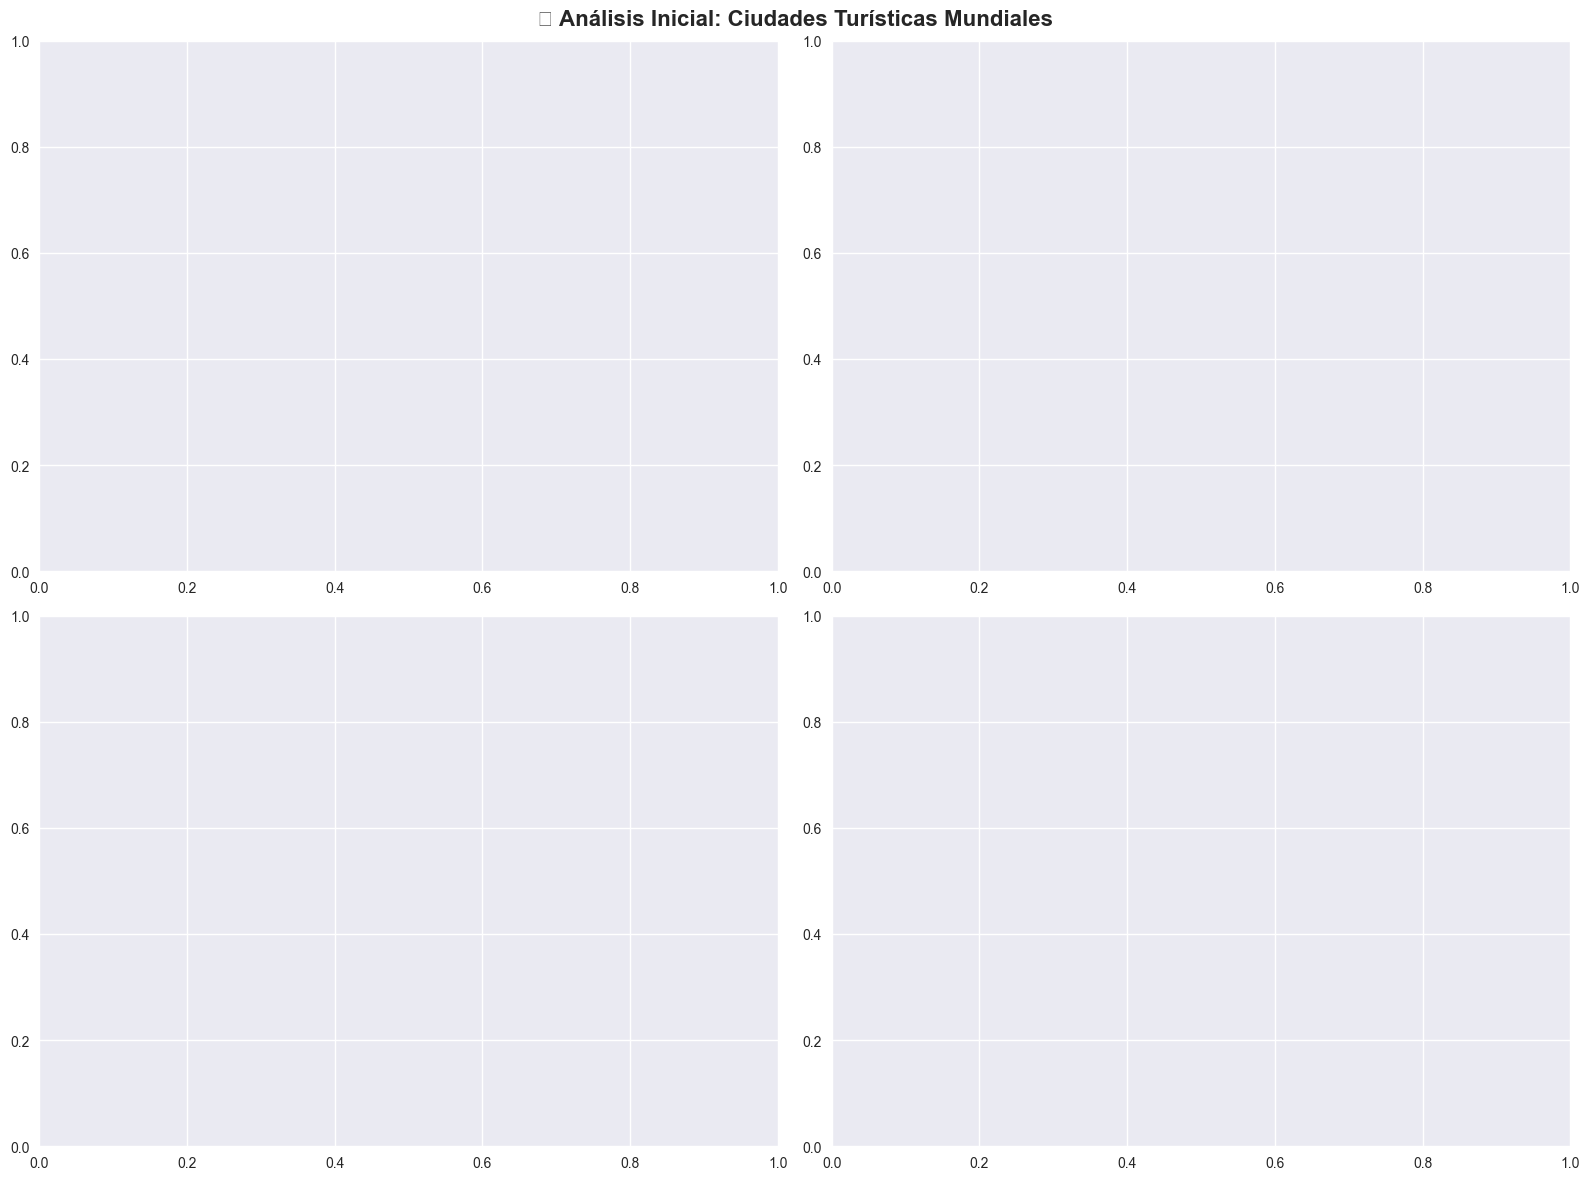

✅ Visualizaciones iniciales creadas

✅ FASE 1 COMPLETADA EXITOSAMENTE
📊 Dataset de ciudades turísticas cargado y explorado
🌍 560 ciudades analizadas
📝 Próximo paso: Limpieza y preprocesamiento de datos
🏖️ ANÁLISIS ESPECÍFICO DE TURISMO


In [10]:
# ========================================
# 6. ANÁLISIS ESPECÍFICO DEL DATASET
# ========================================

def targeted_analysis_tourism(df):
    """
    Análisis específico para el dataset de turismo
    """
    print("="*70)
    print("🏖️ ANÁLISIS ESPECÍFICO DE TURISMO")
    print("="*70)
    
    # Análisis de ratings
    rating_columns = [col for col in df.columns if 'Rating' in col]
    if rating_columns:
        print(f"\n⭐ ANÁLISIS DE RATINGS:")
        print(f"Variables de rating encontradas: {len(rating_columns)}")
        
        for col in rating_columns:
            mean_rating = df[col].mean()
            std_rating = df[col].std()
            print(f"   • {col}: {mean_rating:.2f} ± {std_rating:.2f}")
    
    # Análisis de clima
    climate_columns = [col for col in df.columns if any(keyword in col.lower() 
                      for keyword in ['temperature', 'rainfall', 'humidity', 'sunshine'])]
    
    if climate_columns:
        print(f"\n🌤️ ANÁLISIS DE CLIMA:")
        print(f"Variables de clima encontradas: {len(climate_columns)}")
        
        for col in climate_columns:
            if df[col].dtype in ['int64', 'float64']:
                mean_val = df[col].mean()
                std_val = df[col].std()
                print(f"   • {col}: {mean_val:.2f} ± {std_val:.2f}")
    
    # Análisis de costos
    cost_columns = [col for col in df.columns if any(keyword in col.lower() 
                   for keyword in ['cost', 'price', 'expense'])]
    
    if cost_columns:
        print(f"\n💰 ANÁLISIS DE COSTOS:")
        for col in cost_columns:
            if df[col].dtype in ['int64', 'float64']:
                mean_cost = df[col].mean()
                median_cost = df[col].median()
                print(f"   • {col}: Media {mean_cost:.2f}, Mediana {median_cost:.2f}")
    
    # Ciudades extremas
    if 'Overall_Rating' in df.columns and 'City' in df.columns:
        print(f"\n🏆 CIUDADES DESTACADAS:")
        
        # Top 5 mejor valoradas
        top_5 = df.nlargest(5, 'Overall_Rating')
        print("Top 5 ciudades mejor valoradas:")
        for idx, row in top_5.iterrows():
            print(f"   • {row['City']}: {row['Overall_Rating']:.1f}/10")
        
        # Bottom 5 peor valoradas
        bottom_5 = df.nsmallest(5, 'Overall_Rating')
        print("\nTop 5 ciudades con menor rating:")
        for idx, row in bottom_5.iterrows():
            print(f"   • {row['City']}: {row['Overall_Rating']:.1f}/10")
    
    return True

# Ejecutar si se llama directamente
if __name__ == "__main__":
    df, statistics, quality_info = main_phase1_cities()
    targeted_analysis_tourism(df)